In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [2]:
cci = pd.read_csv("cci.csv")
cci['TIME'] = pd.to_datetime(cci['TIME'])
cci = cci[cci['TIME'].dt.month.isin([1, 4, 7, 10])]
cci['TIME'] = cci['TIME'] + pd.offsets.MonthEnd(0)
cci = cci.rename(columns={'Value': 'CCI'})
cci

,LOCATION,TIME,CCI
2,USA,1995-10-31,100.48220
5,USA,1996-01-31,100.44440
8,USA,1996-04-30,100.69070
11,USA,1996-07-31,100.93850
14,USA,1996-10-31,101.27220
...,...,...,...
326,USA,2022-10-31,96.77125
329,USA,2023-01-31,97.33643
332,USA,2023-04-30,97.24804
335,USA,2023-07-31,97.90887


In [3]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the CCI column
cci['CCI_2'] = scaler.fit_transform(cci[['CCI']])

del cci['CCI']

# Display the first few rows of the updated DataFrame
print(cci)


    LOCATION       TIME     CCI_2
2        USA 1995-10-31  0.287274
5        USA 1996-01-31  0.263955
8        USA 1996-04-30  0.415899
11       USA 1996-07-31  0.568768
14       USA 1996-10-31  0.774630
..       ...        ...       ...
326      USA 2022-10-31 -2.002032
329      USA 2023-01-31 -1.653369
332      USA 2023-04-30 -1.707897
335      USA 2023-07-31 -1.300228
338      USA 2023-10-31 -1.536163

[113 rows x 3 columns]


In [4]:
cci = cci.rename(columns={'CCI_2': 'CCI'})

cci = cci[cci['TIME'].dt.year > 2008]
cci = cci.rename(columns={'TIME': 'DATE'})

cci.to_excel("cci_final.xlsx")

In [5]:
hmci = pd.read_excel("hmci.xlsx")

selected_columns = ['Dates', 'USA']
hmci = hmci[selected_columns]

# Select only rows where the 'USA' column is not NaN
hmci = hmci[hmci['USA'].notna()]

hmci = hmci.rename(columns={'Dates': 'DATE'})
hmci = hmci.rename(columns={'USA': 'HMCI'})

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the CCI column
hmci['HMCI_2'] = scaler.fit_transform(hmci[['HMCI']])

del hmci['HMCI']

hmci.to_excel("hmci_final.xlsx")

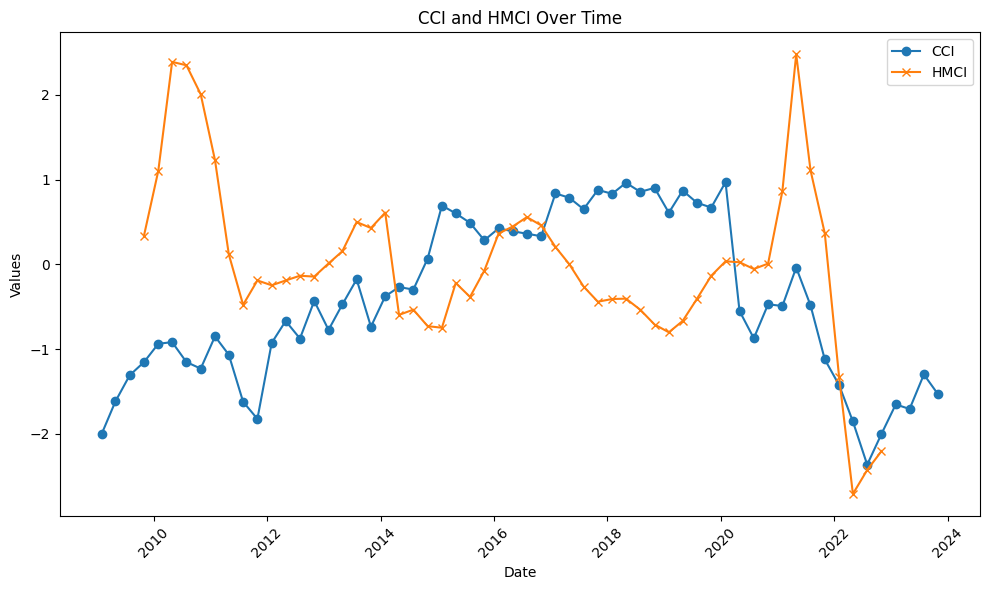

In [6]:
# Step 1: Merge the DataFrames on 'DATE'
merged_df = pd.merge(cci, hmci, on='DATE', how='outer')

# Step 2: Plotting
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(merged_df['DATE'], merged_df['CCI'], label='CCI', marker='o')  # Plot CCI
plt.plot(merged_df['DATE'], merged_df['HMCI_2'], label='HMCI', marker='x')  # Plot HMCI

plt.xlabel('Date')  # X-axis label
plt.ylabel('Values')  # Y-axis label
plt.title('CCI and HMCI Over Time')  # Title of the plot
plt.legend()  # Show legend
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()  # Adjust layout

# Display the plot
plt.show()

In [7]:
csi = pd.read_csv("csi.csv")
csi

,QUARTER,YEAR,CSI
0,Jan.-Mar.,1960,100.0
1,Apr.-June,1960,93.3
2,Jul.-Sep.,1960,97.2
3,Oct.-Dec.,1960,90.1
4,Jan.-Mar.,1961,91.6
...,...,...,...
250,Jul.-Sep.,2022,56.1
251,Oct.-Dec.,2022,58.8
252,Jan.-Mar.,2023,64.6
253,Apr.-June,2023,62.3


In [8]:
# Define a mapping from quarters to month-day strings
quarter_mapping = {
    'Jan.-Mar.': '03-31',
    'Apr.-June': '06-30',
    'Jul.-Sep.': '09-30',
    'Oct.-Dec.': '12-31'
}

# Function to apply the mapping and create a datetime string
def get_end_of_quarter(row):
    return f"{row['YEAR']}-{quarter_mapping[row['QUARTER']]} 00:00:00"

# Apply the function to each row
csi['DATE'] = csi.apply(get_end_of_quarter, axis=1)

# Convert the DATE column to a datetime object
csi['DATE'] = pd.to_datetime(csi['DATE'])
del csi["QUARTER"]
del csi["YEAR"]
# Show the updated DataFrame
print(csi)

       CSI       DATE
0    100.0 1960-03-31
1     93.3 1960-06-30
2     97.2 1960-09-30
3     90.1 1960-12-31
4     91.6 1961-03-31
..     ...        ...
250   56.1 2022-09-30
251   58.8 2022-12-31
252   64.6 2023-03-31
253   62.3 2023-06-30
254   69.6 2023-09-30

[255 rows x 2 columns]


In [9]:
csi = csi[csi['DATE'].dt.year > 2008]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the CCI column
csi['CSI_2'] = scaler.fit_transform(csi[['CSI']])

del csi['CSI']

csi.to_excel("csi_final.xlsx")

/var/folders/r0/hjhrg4xn3rq_pd15xnr0ln4r0000gn/T/ipykernel_81135/3892239232.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csi['CSI_2'] = scaler.fit_transform(csi[['CSI']])


/var/folders/r0/hjhrg4xn3rq_pd15xnr0ln4r0000gn/T/ipykernel_81135/3381713374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csi['DATE'] = pd.to_datetime(csi['DATE'])


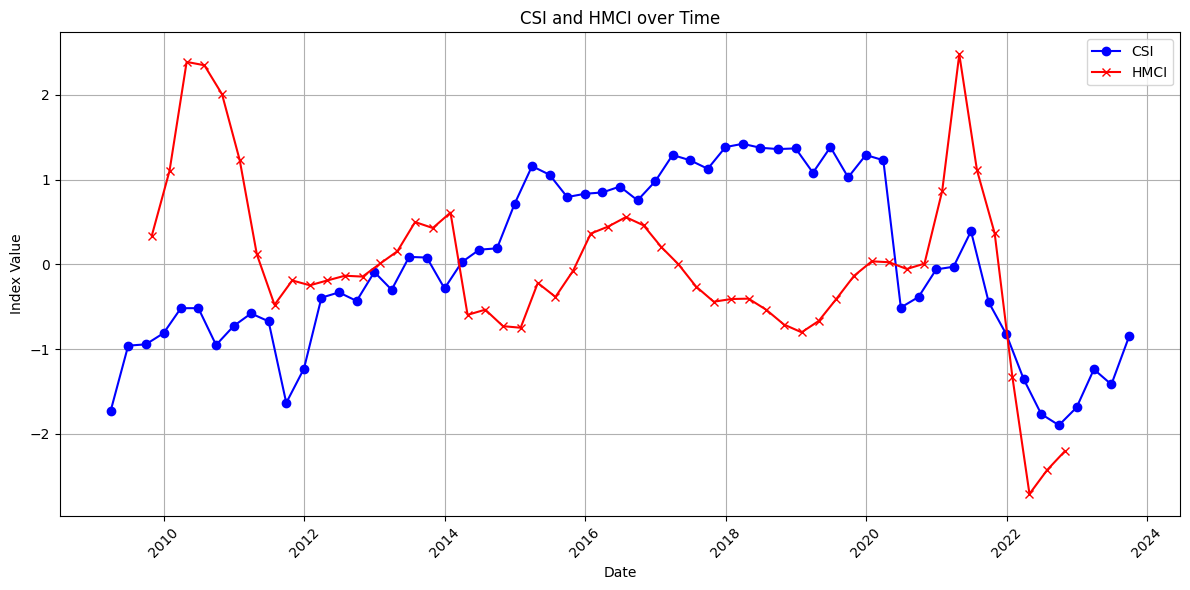

In [10]:
# Convert 'DATE' columns to datetime
csi['DATE'] = pd.to_datetime(csi['DATE'])
hmci['DATE'] = pd.to_datetime(hmci['DATE'])

# Merge the two DataFrames on 'DATE'
merged_df = pd.merge(csi, hmci, on='DATE', how='outer')

# Plotting
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot CSI
plt.plot(merged_df['DATE'], merged_df['CSI_2'], label='CSI', marker='o', color='blue')

# Plot HMCI
plt.plot(merged_df['DATE'], merged_df['HMCI_2'], label='HMCI', marker='x', color='red')

# Formatting the plot
plt.xlabel('Date')  # X-axis label
plt.ylabel('Index Value')  # Y-axis label
plt.title('CSI and HMCI over Time')  # Title
plt.legend()  # Legend to differentiate the lines
plt.grid(True)  # Add gridlines for better readability

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Adjust the plot layout for better fit
plt.tight_layout()

# Display the plot
plt.show()


In [11]:
vix = pd.read_csv('vix.csv')
vix

,DATE,VIX
0,2/1/90,21.990000
1,3/1/90,19.730000
2,4/1/90,19.520000
3,5/1/90,17.370001
4,6/1/90,15.500000
...,...,...
402,8/1/23,NaN
403,9/1/23,NaN
404,10/1/23,NaN
405,11/1/23,NaN


In [12]:
vix['DATE'] = pd.to_datetime(vix['DATE'])

# Set 'DATE' as the index of the DataFrame
vix.set_index('DATE', inplace=True)

# Resample to quarterly frequency, taking the mean for each quarter
vix_quarterly = vix.resample('Q').mean()

# Assign custom quarter-end dates based on the quarter
custom_quarters = {
    1: '-01-31', 2: '-04-30', 3: '-07-31', 4: '-10-31'
}
vix_quarterly.index = vix_quarterly.index.to_series().apply(
    lambda x: pd.Timestamp(f"{x.year}{custom_quarters[x.quarter]}")
)

# Reset the index if you want 'DATE' back as a column
vix_quarterly.reset_index(inplace=True)


/var/folders/r0/hjhrg4xn3rq_pd15xnr0ln4r0000gn/T/ipykernel_81135/2261162129.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  vix['DATE'] = pd.to_datetime(vix['DATE'])


In [13]:
vix = vix_quarterly[vix_quarterly['DATE'].dt.year > 2008]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the CCI column
vix['VIX_2'] = scaler.fit_transform(vix[['VIX']])

del vix['VIX']

vix.to_excel("vix_final.xlsx")

/var/folders/r0/hjhrg4xn3rq_pd15xnr0ln4r0000gn/T/ipykernel_81135/2818650352.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vix['VIX_2'] = scaler.fit_transform(vix[['VIX']])


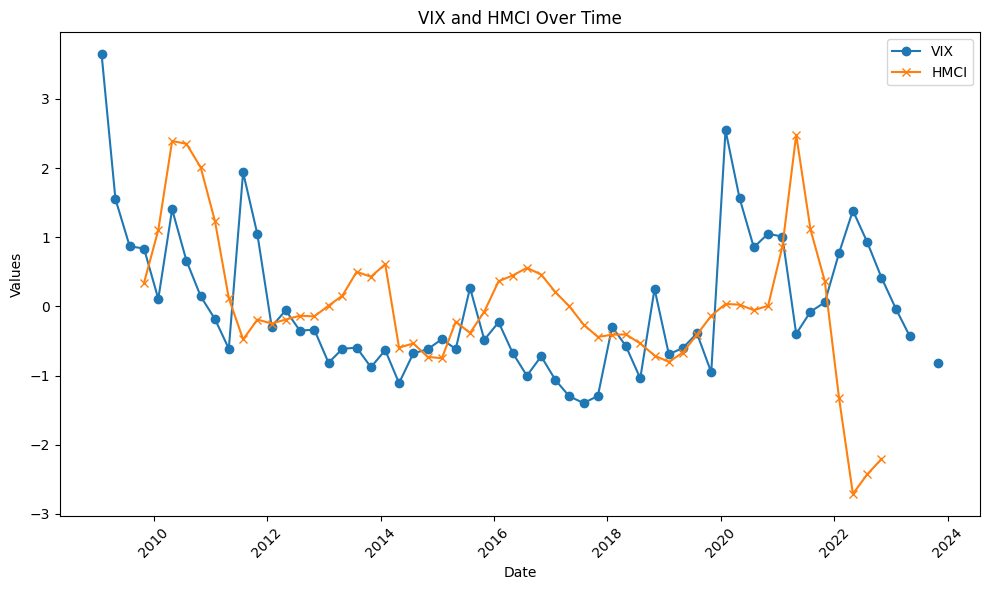

In [14]:
# Step 1: Merge the DataFrames on 'DATE'
merged_df = pd.merge(vix, hmci, on='DATE', how='outer')

# Step 2: Plotting
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(merged_df['DATE'], merged_df['VIX_2'], label='VIX', marker='o')  # Plot CCI
plt.plot(merged_df['DATE'], merged_df['HMCI_2'], label='HMCI', marker='x')  # Plot HMCI

plt.xlabel('Date')  # X-axis label
plt.ylabel('Values')  # Y-axis label
plt.title('VIX and HMCI Over Time')  # Title of the plot
plt.legend()  # Show legend
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()  # Adjust layout

# Display the plot
plt.show()

In [15]:
hmci2 = pd.read_excel("hmci_final.xlsx")
vix2 = pd.read_excel("vix_final.xlsx")
csi2 = pd.read_excel("csi_final.xlsx")
cci2 = pd.read_excel("cci_final.xlsx")


In [16]:
hmci3 = hmci2.copy()
vix3 = vix2.copy()
csi3 = csi2.copy()
cci3 = cci2.copy()

hmci3 = hmci3[hmci3['DATE'].dt.year < 2020]
vix3 = vix3[vix3['DATE'].dt.year < 2020]
csi3 = csi3[csi3['DATE'].dt.year < 2020]
cci3 = cci3[cci3['DATE'].dt.year < 2020]


In [17]:
hmci2['DATE'] = pd.to_datetime(hmci2['DATE']).dt.to_period('Q')

vix2['DATE'] = pd.to_datetime(vix2['DATE']).dt.to_period('Q')

# Merge the two DataFrames on the 'DATE' column
merged_df = pd.merge(hmci2, vix2, on='DATE', how='inner')

numerical_df = merged_df.select_dtypes(include=[float, int])

print(numerical_df)
# Now calculate the correlation coefficient
correlation = numerical_df.corr().iloc[0, 1]

# To calculate the significance of the correlation, use scipy's pearsonr
# This assumes your numerical columns are named 'Index1' and 'Index2'
correlation_coefficient, p_value = pearsonr(numerical_df['HMCI_2'], numerical_df['VIX_2'])

print(f"Correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Check if the correlation is statistically significant
alpha = 0.05  # Commonly used significance level
if p_value < alpha:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")


    Unnamed: 0_x    HMCI_2  Unnamed: 0_y     VIX_2
0             59  0.340287            79  0.836733
1             60  1.104265            80  0.108191
2             61  2.390127            81  1.402469
3             62  2.350708            82  0.662401
4             63  2.008640            83  0.145651
5             64  1.230056            84 -0.184282
6             65  0.118134            85 -0.611706
7             66 -0.477634            86  1.938910
8             67 -0.190161            87  1.042280
9             68 -0.247258            88 -0.292339
10            69 -0.190403            89 -0.056055
11            70 -0.134420            90 -0.351890
12            71 -0.144605            91 -0.334601
13            72  0.010486            92 -0.814853
14            73  0.154866            93 -0.613627
15            74  0.499593            94 -0.595378
16            75  0.429021            95 -0.878246
17            76  0.610702            96 -0.632357
18            77 -0.596423     

In [18]:
cci2['DATE'] = pd.to_datetime(cci2['DATE']).dt.to_period('Q')

# Merge the two DataFrames on the 'DATE' column
merged_df = pd.merge(hmci2, cci2, on='DATE', how='inner')

numerical_df = merged_df.select_dtypes(include=[float, int])

print(numerical_df)
# Now calculate the correlation coefficient
correlation = numerical_df.corr().iloc[0, 1]

# To calculate the significance of the correlation, use scipy's pearsonr
# This assumes your numerical columns are named 'Index1' and 'Index2'
correlation_coefficient, p_value = pearsonr(numerical_df['HMCI_2'], numerical_df['CCI'])

print(f"Correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Check if the correlation is statistically significant
alpha = 0.05  # Commonly used significance level
if p_value < alpha:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")


    Unnamed: 0_x    HMCI_2  Unnamed: 0_y       CCI
0             59  0.340287           170 -1.153904
1             60  1.104265           173 -0.937808
2             61  2.390127           176 -0.918314
3             62  2.350708           179 -1.153330
4             63  2.008640           182 -1.231011
5             64  1.230056           185 -0.850812
6             65  0.118134           188 -1.067327
7             66 -0.477634           191 -1.622314
8             67 -0.190161           194 -1.824567
9             68 -0.247258           197 -0.927863
10            69 -0.190403           200 -0.668880
11            70 -0.134420           203 -0.875686
12            71 -0.144605           206 -0.431995
13            72  0.010486           209 -0.773477
14            73  0.154866           212 -0.473543
15            74  0.499593           215 -0.177558
16            75  0.429021           218 -0.736271
17            76  0.610702           221 -0.377010
18            77 -0.596423     

In [19]:
csi2['DATE'] = pd.to_datetime(csi2['DATE']).dt.to_period('Q')

# Merge the two DataFrames on the 'DATE' column
merged_df = pd.merge(hmci2, csi2, on='DATE', how='inner')

numerical_df = merged_df.select_dtypes(include=[float, int])

print(numerical_df)
# Now calculate the correlation coefficient
correlation = numerical_df.corr().iloc[0, 1]

# To calculate the significance of the correlation, use scipy's pearsonr
# This assumes your numerical columns are named 'Index1' and 'Index2'
correlation_coefficient, p_value = pearsonr(numerical_df['HMCI_2'], numerical_df['CSI_2'])

print(f"Correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Check if the correlation is statistically significant
alpha = 0.05  # Commonly used significance level
if p_value < alpha:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")


    Unnamed: 0_x    HMCI_2  Unnamed: 0_y     CSI_2
0             59  0.340287           199 -0.812429
1             60  1.104265           200 -0.517455
2             61  2.390127           201 -0.517455
3             62  2.350708           202 -0.952154
4             63  2.008640           203 -0.727042
5             64  1.230056           204 -0.579555
6             65  0.118134           205 -0.672705
7             66 -0.477634           206 -1.635253
8             67 -0.190161           207 -1.231603
9             68 -0.247258           208 -0.393255
10            69 -0.190403           209 -0.331155
11            70 -0.134420           210 -0.432068
12            71 -0.144605           211 -0.090518
13            72  0.010486           212 -0.300105
14            73  0.154866           213  0.088019
15            74  0.499593           214  0.080256
16            75  0.429021           215 -0.284581
17            76  0.610702           216  0.025919
18            77 -0.596423     

In [20]:
hmci3['DATE'] = pd.to_datetime(hmci3['DATE']).dt.to_period('Q')

vix3['DATE'] = pd.to_datetime(vix3['DATE']).dt.to_period('Q')

# Merge the two DataFrames on the 'DATE' column
merged_df = pd.merge(hmci3, vix3, on='DATE', how='inner')

numerical_df = merged_df.select_dtypes(include=[float, int])

# Now calculate the correlation coefficient
correlation = numerical_df.corr().iloc[0, 1]

# To calculate the significance of the correlation, use scipy's pearsonr
# This assumes your numerical columns are named 'Index1' and 'Index2'
correlation_coefficient, p_value = pearsonr(numerical_df['HMCI_2'], numerical_df['VIX_2'])

print(f"Correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Check if the correlation is statistically significant
alpha = 0.05  # Commonly used significance level
if p_value < alpha:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")


Correlation coefficient: 0.35043899325664624
P-value: 0.02468643400126797
The correlation is statistically significant.


In [21]:
csi3['DATE'] = pd.to_datetime(csi3['DATE']).dt.to_period('Q')
# Merge the two DataFrames on the 'DATE' column
merged_df = pd.merge(hmci3, csi3, on='DATE', how='inner')
numerical_df = merged_df.select_dtypes(include=[float, int])

# Now calculate the correlation coefficient
correlation = numerical_df.corr().iloc[0, 1]

# To calculate the significance of the correlation, use scipy's pearsonr
# This assumes your numerical columns are named 'Index1' and 'Index2'
correlation_coefficient, p_value = pearsonr(numerical_df['HMCI_2'], numerical_df['CSI_2'])

print(f"Correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Check if the correlation is statistically significant
alpha = 0.05  # Commonly used significance level
if p_value < alpha:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")


Correlation coefficient: -0.4838161411629229
P-value: 0.0013515123150378509
The correlation is statistically significant.


In [22]:
cci3['DATE'] = pd.to_datetime(cci3['DATE']).dt.to_period('Q')
# Merge the two DataFrames on the 'DATE' column
merged_df = pd.merge(hmci3, cci3, on='DATE', how='inner')
numerical_df = merged_df.select_dtypes(include=[float, int])

# Now calculate the correlation coefficient
correlation = numerical_df.corr().iloc[0, 1]

# To calculate the significance of the correlation, use scipy's pearsonr
# This assumes your numerical columns are named 'Index1' and 'Index2'
correlation_coefficient, p_value = pearsonr(numerical_df['HMCI_2'], numerical_df['CCI'])

print(f"Correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Check if the correlation is statistically significant
alpha = 0.05  # Commonly used significance level
if p_value < alpha:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")


Correlation coefficient: -0.47848835018221175
P-value: 0.001553723544111489
The correlation is statistically significant.


In [28]:
# Data: https://www.newyorkfed.org/microeconomics/hhdc 
loans = pd.read_excel("loan_growth.xlsx")

# Calculate the quarter-to-quarter percent change
loans['Mortgage_Debt_Pct_Change'] = loans['DOLLARS'].pct_change() * 100

del loans["DOLLARS"]
# Show the updated DataFrame
print(loans)


   QUARTER  Mortgage_Debt_Pct_Change
0    03:Q1                       NaN
1    03:Q2                  2.792392
2    03:Q3                  2.027559
3    03:Q4                  9.203164
4    04:Q1                  3.180212
..     ...                       ...
78   22:Q3                  2.476508
79   22:Q4                  2.176708
80   23:Q1                  1.014845
81   23:Q2                 -0.249087
82   23:Q3                  1.048776

[83 rows x 2 columns]


In [29]:
# Function to convert the quarter format
def convert_quarter_format(q):
    # Split the string on ':'
    year, quarter = q.split(':')
    # Assuming the year is 2000 + year, you may need to adjust this
    full_year = int(year) + 2000
    # Return the new format
    return f'{full_year}{quarter}'

# Apply the function to the 'Quarter' column
loans['DATE'] = loans['QUARTER'].apply(convert_quarter_format)
del loans["QUARTER"]
# Show the updated DataFrame
loans.to_excel("loans_good.xlsx")


In [38]:
df = pd.read_csv("loans_good.csv")

scaler = StandardScaler()

# Fit and transform the CCI column
df['X2'] = scaler.fit_transform(df[['X']])
df['Y2'] = scaler.fit_transform(df[['Y']])
del df['Y']
del df['X']

df.to_csv("mcmc_data.csv")

,X2,Y2
0,0.203385,-0.003541
1,1.154735,-0.441073
2,2.755966,0.087621
3,2.706878,-0.324774
4,2.280916,0.342845
5,1.311377,0.168091
6,-0.073253,-0.040209
7,-0.815138,-0.201858
8,-0.457160,-0.239279
9,-0.528260,0.196780


In [34]:
# Load your data into a DataFrame
# df = pd.read_csv('your_data.csv')

# Assume 'HMCI' is your feature and 'Loan_Growth' is your target
X = df[['HMCI2']]
y = df['LOAN GROWTH 2']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R² score: {r2}')


MSE: 0.7832295669895977
R² score: -0.0016546894749049912
